## CNN Exploration

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import itertools

2025-10-28 14:00:46.144086: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


### 1) Architecture exploration

In [3]:
# C1 (baseline): conv32 → pool → conv64 → pool → conv128 → flatten → dense128
# C2 (wider): conv64 → pool → conv128 → pool → conv256 → flatten → dense256
# C3 (shallower): conv32 → pool → conv64 → flatten → dense128

In [2]:
######### Dataset

# Load dataset
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

# Split train/validation
X_valid, X_train = X_train_full[:6000] / 255.0, X_train_full[6000:] / 255.0
y_valid, y_train = y_train_full[:6000], y_train_full[6000:]

# Normalization of data for network stability
X_test = X_test / 255.0

### 1.1) CNN 1

In [13]:
X_test.shape

(10000, 28, 28)

In [5]:
# 1. Build the CNN model
model = keras.models.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='softmax')
])

# 2. Compile the model
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

#2.1 Summary
model.summary()

#2.2 Early stop
early_stop = EarlyStopping(
    monitor='val_loss', 
    patience=3, 
    restore_best_weights=True
)

# 3. Train the model
history = model.fit(
    X_train, y_train,
    epochs=15,
    batch_size=128,
    validation_data=(X_valid, y_valid)
)

# 4. Evaluate on the test set
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc:.4f}")
print(f"Test loss: {test_loss:.4f}")

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 7, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       802,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 896,906 (3.42 MB)

 Trainable params: 896,906 (3.42 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 33s 76ms/step - accuracy: 0.7867 - loss: 0.5925 - val_accuracy: 0.8680 - val_loss: 0.3498
Epoch 2/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 34s 80ms/step - accuracy: 0.8733 - loss: 0.3581 - val_accuracy: 0.8977 - val_loss: 0.2840
Epoch 3/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 46s 110ms/step - accuracy: 0.8900 - loss: 0.3056 - val_accuracy: 0.9053 - val_loss: 0.2579
Epoch 4/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 58s 138ms/step - accuracy: 0.9049 - loss: 0.2659 - val_accuracy: 0.9145 - val_loss: 0.2335
Epoch 5/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 47s 111ms/step - accuracy: 0.9122 - loss: 0.2448 - val_accuracy: 0.9188 - val_loss: 0.2180
Epoch 6/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 49s 117ms/step - accuracy: 0.9185 - loss: 0.2227 - val_accuracy: 0.9232 - val_loss: 0.2060
Epoch 7/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 54s 129ms/step - accuracy: 0.9251 - loss: 0.2040 - val_accuracy: 0.9207 - val_loss: 0.2175
Epoch 8/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 53s 125ms/step - accuracy: 0.9300 - loss: 0.1

### 1.2) CNN 2

In [6]:
# 1. Build the CNN model
# C2 (wider): conv64 → pool → conv128 → pool → conv256 → flatten → dense256
model = keras.models.Sequential([
    keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    keras.layers.Flatten(),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='softmax')
])

# 2. Compile the model
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

#2.1 Summary
model.summary()

#2.2 Early stop
early_stop = EarlyStopping(
    monitor='val_loss', 
    patience=3, 
    restore_best_weights=True
)

# 3. Train the model
history = model.fit(
    X_train, y_train,
    epochs=15,
    batch_size=128,
    validation_data=(X_valid, y_valid)
)

# 4. Evaluate on the test set
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc:.4f}")
print(f"Test loss: {test_loss:.4f}")

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 28, 28, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 14, 14, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 7, 7, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │     3,211,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,583,754 (13.67 MB)

 Trainable params: 3,583,754 (13.67 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 94s 217ms/step - accuracy: 0.8228 - loss: 0.4908 - val_accuracy: 0.8865 - val_loss: 0.3119
Epoch 2/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 89s 211ms/step - accuracy: 0.8926 - loss: 0.2990 - val_accuracy: 0.9050 - val_loss: 0.2532
Epoch 3/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 70s 167ms/step - accuracy: 0.9075 - loss: 0.2515 - val_accuracy: 0.9145 - val_loss: 0.2322
Epoch 4/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 72s 170ms/step - accuracy: 0.9194 - loss: 0.2178 - val_accuracy: 0.9203 - val_loss: 0.2140
Epoch 5/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 67s 158ms/step - accuracy: 0.9292 - loss: 0.1903 - val_accuracy: 0.9240 - val_loss: 0.2052
Epoch 6/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 82s 195ms/step - accuracy: 0.9367 - loss: 0.1700 - val_accuracy: 0.9297 - val_loss: 0.1933
Epoch 7/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 85s 201ms/step - accuracy: 0.9453 - loss: 0.1483 - val_accuracy: 0.9253 - val_loss: 0.2191
Epoch 8/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 95s 224ms/step - accuracy: 0.9506 - loss: 0

### 1.3) CNN 3

In [7]:
# 1. Build the CNN model
# C3 (shallower): conv32 → pool → conv64 → flatten → dense128
model = keras.models.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='softmax')
])

# 2. Compile the model
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

#2.1 Summary
model.summary()

#2.2 Early stop
early_stop = EarlyStopping(
    monitor='val_loss', 
    patience=3, 
    restore_best_weights=True
)

# 3. Train the model
history = model.fit(
    X_train, y_train,
    epochs=15,
    batch_size=128,
    validation_data=(X_valid, y_valid)
)

# 4. Evaluate on the test set
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc:.4f}")
print(f"Test loss: {test_loss:.4f}")

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,625,866 (6.20 MB)

 Trainable params: 1,625,866 (6.20 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 27s 62ms/step - accuracy: 0.7996 - loss: 0.5622 - val_accuracy: 0.8807 - val_loss: 0.3326
Epoch 2/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 30s 72ms/step - accuracy: 0.8723 - loss: 0.3617 - val_accuracy: 0.9022 - val_loss: 0.2765
Epoch 3/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 32s 76ms/step - accuracy: 0.8897 - loss: 0.3086 - val_accuracy: 0.9073 - val_loss: 0.2494
Epoch 4/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 33s 77ms/step - accuracy: 0.9011 - loss: 0.2705 - val_accuracy: 0.9143 - val_loss: 0.2328
Epoch 5/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 32s 77ms/step - accuracy: 0.9112 - loss: 0.2477 - val_accuracy: 0.9230 - val_loss: 0.2125
Epoch 6/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 33s 77ms/step - accuracy: 0.9193 - loss: 0.2234 - val_accuracy: 0.9222 - val_loss: 0.2165
Epoch 7/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 34s 81ms/step - accuracy: 0.9226 - loss: 0.2103 - val_accuracy: 0.9273 - val_loss: 0.2039
Epoch 8/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 36s 84ms/step - accuracy: 0.9296 - loss: 0.1927 - 

### 2) Parameters Exploration

### 2.1) Model Building Function

In [8]:
def build_cnn(
    input_shape=(28, 28, 1),
    activation='relu',
    optimizer='adam',
    dropout_rate=None,
    l1_reg=None,
    l2_reg=None,
    initializer='he_normal'
):
    
    
    # Regularizer
    if l1_reg or l2_reg:
        reg = keras.regularizers.L1L2(l1=l1_reg or 0.0, l2=l2_reg or 0.0)
    else:
        reg = None

    model = keras.models.Sequential([
        keras.layers.Conv2D(32, (3, 3), activation=activation, padding='same',
                            kernel_regularizer=reg, kernel_initializer=initializer,
                            input_shape=input_shape),
        keras.layers.MaxPooling2D((2, 2)),

        keras.layers.Conv2D(64, (3, 3), activation=activation, padding='same',
                            kernel_regularizer=reg, kernel_initializer=initializer),
        keras.layers.Flatten(),

        keras.layers.Dense(128, activation=activation, kernel_regularizer=reg,
                           kernel_initializer=initializer),
    ])

    if dropout_rate:
        model.add(keras.layers.Dropout(dropout_rate))

    model.add(keras.layers.Dense(10, activation='softmax'))

    # Compile
    model.compile(
        loss='sparse_categorical_crossentropy',
        optimizer=optimizer,
        metrics=['accuracy']
    )
    return model

### 2.2) Parameters tunning effects

In [2]:
activation_list = ['relu', keras.layers.LeakyReLU(alpha=0.1), 'tanh']
optimizer_list = ['adam', 'sgd', 'rmsprop']
dropout_rate_list = [None, 0.3, 0.5]
l1_reg_list = [None, 0.001, 0.005]
l2_reg_list = [None, 0.001, 0.005]

/Users/usuario/anaconda3/envs/dl_intro/lib/python3.10/site-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [3]:
param_combinations = list(itertools.product(
    activation_list,
    optimizer_list,
    dropout_rate_list,
    l1_reg_list,
    l2_reg_list
))

In [4]:
len(param_combinations)

243

In [25]:
param_combinations[200:243]

[('tanh', 'sgd', 0.3, None, 0.005),
 ('tanh', 'sgd', 0.3, 0.001, None),
 ('tanh', 'sgd', 0.3, 0.001, 0.001),
 ('tanh', 'sgd', 0.3, 0.001, 0.005),
 ('tanh', 'sgd', 0.3, 0.005, None),
 ('tanh', 'sgd', 0.3, 0.005, 0.001),
 ('tanh', 'sgd', 0.3, 0.005, 0.005),
 ('tanh', 'sgd', 0.5, None, None),
 ('tanh', 'sgd', 0.5, None, 0.001),
 ('tanh', 'sgd', 0.5, None, 0.005),
 ('tanh', 'sgd', 0.5, 0.001, None),
 ('tanh', 'sgd', 0.5, 0.001, 0.001),
 ('tanh', 'sgd', 0.5, 0.001, 0.005),
 ('tanh', 'sgd', 0.5, 0.005, None),
 ('tanh', 'sgd', 0.5, 0.005, 0.001),
 ('tanh', 'sgd', 0.5, 0.005, 0.005),
 ('tanh', 'rmsprop', None, None, None),
 ('tanh', 'rmsprop', None, None, 0.001),
 ('tanh', 'rmsprop', None, None, 0.005),
 ('tanh', 'rmsprop', None, 0.001, None),
 ('tanh', 'rmsprop', None, 0.001, 0.001),
 ('tanh', 'rmsprop', None, 0.001, 0.005),
 ('tanh', 'rmsprop', None, 0.005, None),
 ('tanh', 'rmsprop', None, 0.005, 0.001),
 ('tanh', 'rmsprop', None, 0.005, 0.005),
 ('tanh', 'rmsprop', 0.3, None, None),
 ('tan

In [17]:
param_combinations[20:30]

[('relu', 'adam', 0.5, None, 0.005),
 ('relu', 'adam', 0.5, 0.001, None),
 ('relu', 'adam', 0.5, 0.001, 0.001),
 ('relu', 'adam', 0.5, 0.001, 0.005),
 ('relu', 'adam', 0.5, 0.005, None),
 ('relu', 'adam', 0.5, 0.005, 0.001),
 ('relu', 'adam', 0.5, 0.005, 0.005),
 ('relu', 'sgd', None, None, None),
 ('relu', 'sgd', None, None, 0.001),
 ('relu', 'sgd', None, None, 0.005)]

In [15]:
param_combinations[199]

('tanh', 'sgd', 0.3, None, 0.001)

In [9]:
param_combinations[200]

('tanh', 'sgd', 0.3, None, 0.005)

In [12]:
param_combinations[201]

('tanh', 'sgd', 0.3, 0.001, None)

In [13]:
param_combinations[202]

('tanh', 'sgd', 0.3, 0.001, 0.001)

In [14]:
param_combinations[203]

('tanh', 'sgd', 0.3, 0.001, 0.005)

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_11 (Conv2D)              │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,625,866 (6.20 MB)

 Trainable params: 1,625,866 (6.20 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
1688/1688 - 51s - 30ms/step - accuracy: 0.7879 - loss: 9.3693 - val_accuracy: 0.8435 - val_loss: 3.4060
Epoch 2/30
1688/1688 - 58s - 34ms/step - accuracy: 0.8023 - loss: 2.2461 - val_accuracy: 0.8267 - val_loss: 1.7097
Epoch 3/30
1688/1688 - 71s - 42ms/step - accuracy: 0.8155 - loss: 1.5350 - val_accuracy: 0.8450 - val_loss: 1.3238
Epoch 4/30
1688/1688 - 73s - 43ms/step - accuracy: 0.8279 - loss: 1.2484 - val_accuracy: 0.8293 - val_loss: 1.1327
Epoch 5/30
1688/1688 - 70s - 41ms/step - accuracy: 0.8346 - loss: 1.0547 - val_accuracy: 0.8402 - val_loss: 0.9714
Epoch 6/30
1688/1688 - 73s - 43ms/step - accuracy: 0.8388 - loss: 0.9195 - val_accuracy: 0.8473 - val_loss: 0.8474
Epoch 7/30
1688/1688 - 78s - 46ms/step - accuracy: 0.8412 - loss: 0.8281 - val_accuracy: 0.8563 - val_loss: 0.7592
Epoch 8/30
1688/1688 - 78s - 46ms/step - accuracy: 0.8440 - loss: 0.7679 - val_accuracy: 0.8612 - val_loss: 0.7076
Epoch 9/30
1688/1688 - 78s - 46ms/step - accuracy: 0.8467 - loss: 0.7313 - val_a

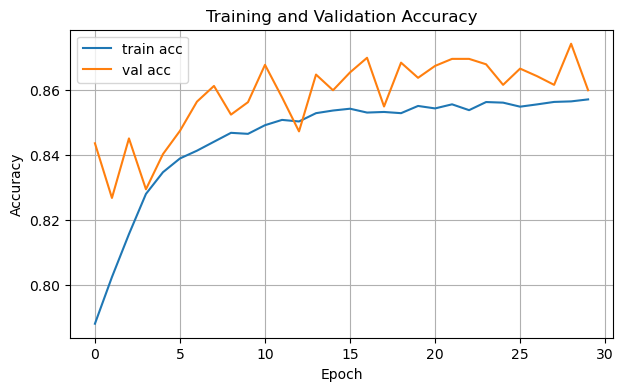

In [12]:
# 1. Model creation
model = build_cnn(activation = activation_list[1], 
                  optimizer = optimizer_list[1],
                  dropout_rate=dropout_rate_list[1], 
                  l1_reg=l1_reg_list[1],
                  l2_reg=l2_reg_list[1]
                 )



# 1.1 Summary check
model.summary()

#1.2 Early stop
early_stop = EarlyStopping(
    monitor='val_loss', 
    patience=3, 
    restore_best_weights=True
)

# 2. Model training
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid), verbose=2)

# 3. Model testing
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")
print(f"Test loss: {test_loss:.4f}")

# 4. Plot learning curves
plt.figure(figsize=(7,4))
plt.plot(history.history["accuracy"], label="train acc")
plt.plot(history.history["val_accuracy"], label="val acc")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

In [14]:
activation_list = ['relu']
optimizer_list = ['adam']
dropout_rate_list = [None]
l1_reg_list = [None]
l2_reg_list = [None]

param_combinations = list(itertools.product(
    activation_list,
    optimizer_list,
    dropout_rate_list,
    l1_reg_list,
    l2_reg_list
))

In [15]:
param_combinations

[('relu', 'adam', None, None, None)]